## 4.1 Subsetting Data

Use python slicing, filters and boolean indexing to subset data. 

We'll use the index method: `.ix` a brick-ton.

### 4.11 Load Libraries

In [2]:
# load libraries
import pandas
import numpy

In [3]:
# ipython magic method for inline plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 4.12 Create Data Frame

In [4]:
# create a table in which each row is a date, each column is a city, each cell is a temperature

# define a date range
days = pandas.date_range('2014-01-01', '2014-02-28', freq='D')

In [5]:
# create a tuple defining the dimensions of the data frame (59x5)
dim = (59,5)

In [8]:
df = pandas.DataFrame(numpy.random.random_integers(-20,40,dim), 
                      index=days, columns=['Madrid', 'Boston', 'Tokyo', 'Shanghai', 'Kolkata']
                     )

df.head()

,Madrid,Boston,Tokyo,Shanghai,Kolkata
2014-01-01,27,23,29,11,-4
2014-01-02,15,35,28,3,-2
2014-01-03,34,30,13,11,7
2014-01-04,22,23,15,-12,40
2014-01-05,-1,2,37,39,17


### 4.13 Subset via slicing and `.ix`

`.ix` accepts both names and offsets  
`.loc` accepts named indexes only, never offsets   
`.iloc` only accepts integer offsets

In [23]:
# ranges of rows and columns

df.ix[3:6, 'Madrid':'Tokyo']

,Madrid,Boston,Tokyo
2014-01-04,22,23,15
2014-01-05,-1,2,37
2014-01-06,1,-1,-12


In [25]:
# specific rows and columns

df.ix[ [3,20,49], ['Shanghai', 'Boston'] ]

,Shanghai,Boston
2014-01-04,-12,23
2014-01-21,-4,15
2014-02-19,20,11


In [26]:
# some rows and all columns

df.ix[ [3,9,11,13], : ]

,Madrid,Boston,Tokyo,Shanghai,Kolkata
2014-01-04,22,23,15,-12,40
2014-01-10,-14,-11,39,4,-14
2014-01-12,-13,2,28,-17,25
2014-01-14,-18,-19,24,8,20


###  4.14 World Bank Dataset

In [33]:
# load the data set
url = 'https://raw.github.com/alfredessa/pdacookbook/master/data/mortality.csv'

m = pandas.read_csv(url)

m.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,4.1,4.0,3.8,3.7,3.6,3.5,3.3,3.2,NaN
2,Afghanistan,NaN,352.5,346.9,341.8,336.8,331.6,326.2,321.2,316.2,...,121.0,117.7,114.5,111.5,108.8,106.2,103.7,101.2,98.5,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,196.4,194.2,191.1,187.1,182.6,177.9,173.1,168.5,163.5,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.3,22.2,21.2,20.3,19.5,18.8,18.1,17.4,16.7,NaN


In [36]:
# set index

m = m.set_index('Country Name')

m.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,4.1,4.0,3.8,3.7,3.6,3.5,3.3,3.2,NaN
Afghanistan,NaN,352.5,346.9,341.8,336.8,331.6,326.2,321.2,316.2,311.4,...,121.0,117.7,114.5,111.5,108.8,106.2,103.7,101.2,98.5,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,196.4,194.2,191.1,187.1,182.6,177.9,173.1,168.5,163.5,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.3,22.2,21.2,20.3,19.5,18.8,18.1,17.4,16.7,NaN


In [37]:
# transpose
t = m.T
    
t.head()


Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,206.7,NaN,NaN,NaN,NaN,...,NaN,119.8,152.4,NaN,NaN,NaN,NaN,NaN,205.8,148.8
1961,NaN,NaN,352.5,NaN,NaN,195.6,NaN,NaN,NaN,NaN,...,NaN,114.5,148.0,NaN,NaN,395.7,NaN,NaN,202.0,144.3
1962,NaN,NaN,346.9,NaN,NaN,184.7,NaN,NaN,NaN,NaN,...,NaN,109.7,143.9,NaN,NaN,388.3,NaN,NaN,198.3,139.5
1963,NaN,NaN,341.8,NaN,NaN,173.9,NaN,NaN,NaN,NaN,...,NaN,105.0,139.3,NaN,NaN,382.1,NaN,NaN,195.1,134.9
1964,NaN,NaN,336.8,NaN,NaN,163.1,NaN,NaN,NaN,NaN,...,NaN,100.9,134.8,NaN,NaN,375.5,NaN,NaN,192.4,130.2


In [42]:
# subset 4 countries

comparison = t[ ['Bangladesh','India','Rwanda', 'Uganda'] ]

comparison.tail()

Country Name,Bangladesh,India,Rwanda,Uganda
2009,50.9,63.8,69.4,83.0
2010,47.2,61.2,63.8,78.3
2011,43.8,58.6,58.9,74.0
2012,40.9,56.3,55.0,68.9
2013,NaN,NaN,NaN,NaN


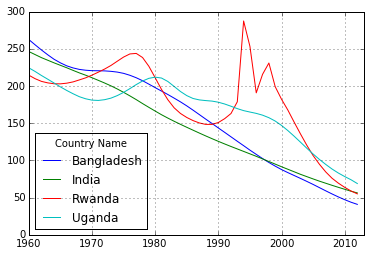

In [43]:
# plot mortalities

comparison.plot()